In [27]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [29]:
!pip install missingno category_encoders xgboost


In [31]:
data = pd.read_csv("Data/data.csv")  # Keep your working path


In [33]:
data.shape


(11914, 16)

In [35]:
data.shape

(11914, 16)

In [37]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


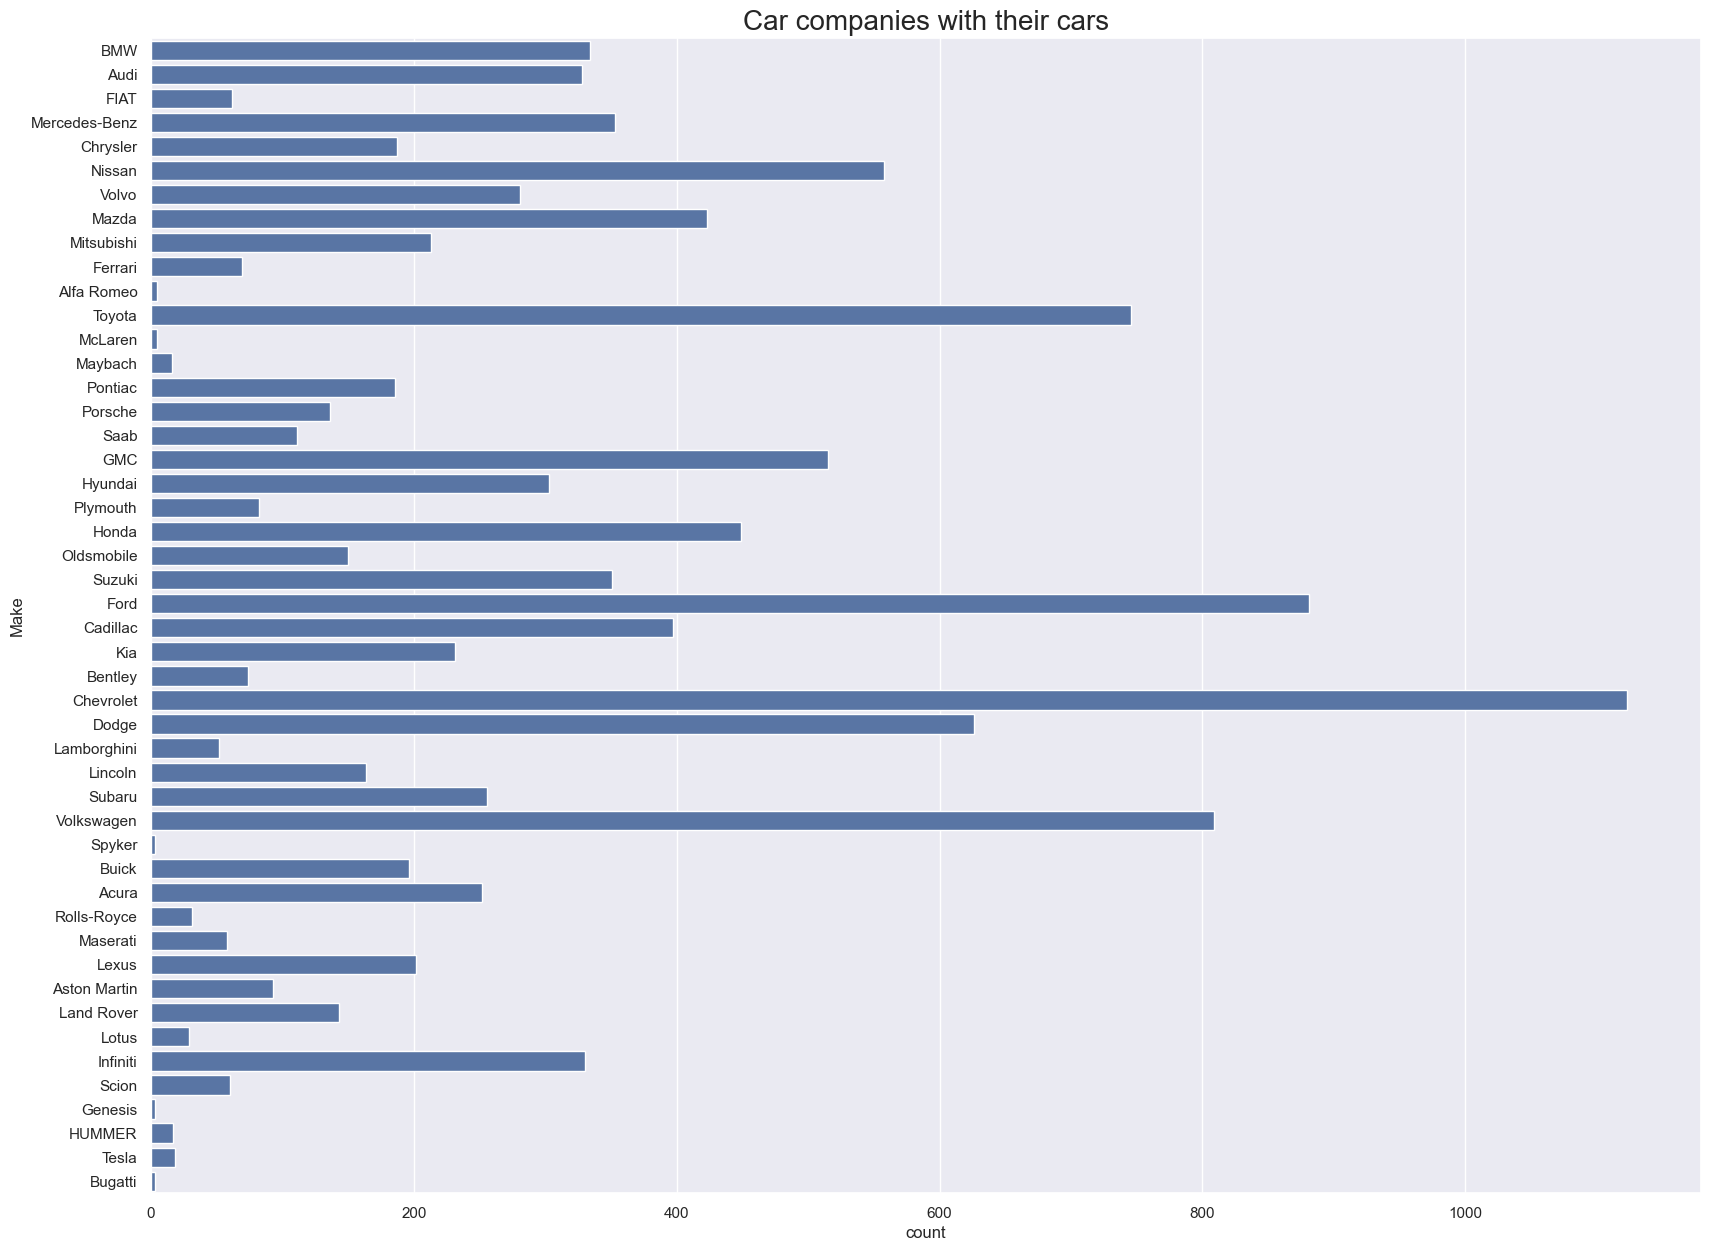

In [39]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (20, 15))
sns.countplot(data.Year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

In [ ]:
data.nunique()

In [ ]:
data.head()

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

In [ ]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

In [ ]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

In [ ]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()


In [ ]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()


In [ ]:
# Group by 'Make' and calculate the average MSRP only
avg_price_by_make = data.groupby('Make')['MSRP'].mean().sort_values(ascending=False)

# Plot it
plt.figure(figsize=(20, 15))
avg_price_by_make.plot(kind='bar', fontsize=12, color='black')
plt.title("Average MSRP by Car Brand", fontsize=20)
plt.ylabel("Price ($)")
plt.show()



In [ ]:
# Group by 'Make' and calculate the median of 'Engine HP' only
median_hp_by_make = data.groupby('Make')['Engine HP'].median().sort_values()

# Plot the result
plt.figure(figsize=(20, 20))
median_hp_by_make.plot(kind='barh', fontsize=12, color='brown')

# Add title and labels
plt.title("Median Engine HP by Car Brand", fontsize=20)
plt.xlabel("Median Engine Horsepower")
plt.ylabel("Car Make")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Group only by 'Driven_Wheels' and compute the average MSRP column safely
avg_price_by_drive = data.groupby('Driven_Wheels')['MSRP'].mean().sort_values()

# Plot the average price based on driven wheels
plt.figure(figsize=(15, 5))
avg_price_by_drive.plot(kind='barh', color='olivedrab')
plt.title("Average Car Price Based on Driven Wheels", fontsize=20)
plt.xlabel("Average MSRP ($)")
plt.ylabel("Driven Wheels Type")
plt.grid(True)
plt.show()


In [ ]:
# Group by 'Make' and calculate the average Popularity only
popularity_by_make = data.groupby('Make')['Popularity'].mean().sort_values(ascending=True)

# Plot the average popularity of each brand
plt.figure(figsize=(15, 15))
popularity_by_make.plot(kind='barh', color='orange')

# Add styling
plt.title("Popularity of Various Car Brands", fontsize=15)
plt.xlabel("Average Popularity")
plt.ylabel("Car Make")
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


In [ ]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [ ]:
data[data['highway MPG'] > 350]

In [ ]:
data = data[data['highway MPG'] < 350]

In [ ]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [ ]:
data['Market Category'].unique()

In [ ]:
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

In [ ]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

In [ ]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

In [ ]:
data = data[data['highway MPG'] < 60]

In [ ]:
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')

In [ ]:
sns.boxplot(x = 'city mpg', data = data)

In [ ]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

In [ ]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

In [ ]:
data = data[data['city mpg'] < 40]

In [ ]:
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['Engine HP'])

In [ ]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

In [ ]:
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)
plt.title("Engine Cylinders vs Popularity", fontsize = 15)
plt.show()

In [ ]:
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)
plt.title("Number of doors vs Popularity", fontsize = 15)
plt.show()

In [ ]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

In [ ]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway MPG", fontsize = 15)
plt.show()

In [ ]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("city mpg vs Engine Cylinders", fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [ ]:
# Group by 'Year' and calculate only the mean of 'highway MPG'
avg_highway_mpg_by_year = data.groupby('Year')['highway MPG'].mean().sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(20, 10))
avg_highway_mpg_by_year.plot(kind='bar', color='darkseagreen')

# Add plot title and labels
plt.title("Average Highway MPG by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Highway MPG")
plt.grid(True)
plt.show()


In [ ]:
data.isnull().sum()

In [ ]:
data['Number of Doors'].median()

In [ ]:
data['Number of Doors'].fillna(4.0, inplace = True)

In [ ]:
data['Number of Doors'].isnull().sum()

In [ ]:
data['Present Year'] = 2021

In [ ]:
data.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Select the features to use for prediction
features = ['Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
            'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Drop rows with missing values in required columns
model_data = data[features + [target]].dropna()

# Define X and y
X = model_data[features]
y = model_data[target]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Align X and y (just in case)
X, y = X.align(y, join='inner', axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display first few rows of training data
X_train.head()


In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Features including 'Make' for encoding
features = ['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
            'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Drop rows with missing values in required columns
model_data = data[features + [target]].dropna()

# Split data
X = model_data[features].copy()
y = model_data[target].copy()

# Apply Target Encoding to 'Make'
encoder = TargetEncoder(cols=['Make'])
X['Make'] = encoder.fit_transform(X['Make'], y)

# One-hot encode the rest of categorical columns
X = pd.get_dummies(X, columns=['Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show encoded training data
X_train.head()


In [ ]:
from sklearn.model_selection import train_test_split

# Define features including 'Engine Fuel Type'
features = ['Engine Fuel Type', 'Year', 'Engine HP', 'Engine Cylinders', 
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 
            'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Remove missing data
model_data = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = model_data[features].copy()
y = model_data[target].copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check unique values in 'Engine Fuel Type'
X_train["Engine Fuel Type"].unique()


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and target
features = ['Engine Fuel Type', 'Year', 'Engine HP', 'Engine Cylinders',
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 
            'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Drop rows with missing values
model_data = data[features + [target]].dropna()

# Separate features and target
X = model_data[features].copy()
y = model_data[target].copy()

# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
                               'Vehicle Size', 'Vehicle Style'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show first few rows of X_train
X_train.head()


In [ ]:
# Replace Cell 56 with:
features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
            'Vehicle Size', 'Vehicle Style', 'Year', 'Engine HP', 
            'Engine Cylinders', 'city mpg', 'highway MPG']
target = 'MSRP'

model_data = data[features + [target]].dropna()
X = model_data[features]
y = np.log1p(model_data[target])  # Log-transform the target!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Define features and target
features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
            'Vehicle Size', 'Vehicle Style', 'Year', 'Engine HP', 
            'Engine Cylinders', 'city mpg', 'highway MPG']
target = 'MSRP'

# Clean data
model_data = data[features + [target]].dropna()
X = model_data[features].copy()
y = model_data[target].copy()

# Split before encoding
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify columns
categorical_cols = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
numerical_cols = ['Year', 'Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG']

# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_raw[categorical_cols])

one_hot_encoded_output_train = pd.DataFrame(
    encoder.transform(X_train_raw[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train_raw.index
)

one_hot_encoded_output_test = pd.DataFrame(
    encoder.transform(X_test_raw[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test_raw.index
)

# Combine numeric and encoded features
X_train = pd.concat([X_train_raw[numerical_cols].reset_index(drop=True), 
                     one_hot_encoded_output_train.reset_index(drop=True)], axis=1)

X_test = pd.concat([X_test_raw[numerical_cols].reset_index(drop=True), 
                    one_hot_encoded_output_test.reset_index(drop=True)], axis=1)

# Show result
X_train.head()


In [ ]:
# Drop original categorical columns from raw data if still present
for col in ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']:
    if col in X_train.columns:
        X_train.drop(col, axis=1, inplace=True)
    if col in X_test.columns:
        X_test.drop(col, axis=1, inplace=True)


In [ ]:
X_train.info()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
X_train_new.shape

In [ ]:
error_mean_square = []
error_mean_absolute = []

In [ ]:
model = LinearRegression()
model.fit(X_train_new, y_train)

In [ ]:
y_predict = model.predict(X_test_new)

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
error_mean_absolute

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [ ]:
y_predict.head()

In [ ]:
y_test.to_frame().head()

In [ ]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [ ]:
results.head()

In [ ]:

# Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict in log scale, then reverse
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test_real, y_pred)
r2 = r2_score(y_test_real, y_pred)

print("✅ Log-Transformed Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")




In [ ]:
import joblib

model_path = r"D:\CarDealerWeb-Django\CarDealerWeb-Django\ml\car_price_model.pkl"
encoder_path = r"D:\CarDealerWeb-Django\CarDealerWeb-Django\ml\car_encoder.pkl"

model = joblib.load(model_path)
encoder = joblib.load(encoder_path)

# Now save again with compression
joblib.dump(model, model_path, compress=3)
print("✅ Model saved as car_price_model.pkl with compression")

joblib.dump(encoder, encoder_path, compress=3)
print("✅ Encoder saved as car_encoder.pkl with compression")



In [ ]:
import joblib

model_path = r"D:\CarDealerWeb-Django\CarDealerWeb-Django\ml\car_price_model.pkl"
encoder_path = r"D:\CarDealerWeb-Django\CarDealerWeb-Django\ml\car_encoder.pkl"

model = joblib.load(model_path)
encoder = joblib.load(encoder_path)


In [ ]:
import pandas as pd
import numpy as np

# Sample input to test model and encoder
sample_input = {
    'Engine Fuel Type': 'Petrol',
    'Transmission Type': 'Automatic',
    'Driven_Wheels': 'front wheel drive',
    'Vehicle Size': 'Midsize',
    'Vehicle Style': 'Sedan',
    'Year': 2020,
    'Engine HP': 158.0,
    'Engine Cylinders': 1.0,
    'city mpg': 25,
    'highway MPG': 25,
}

df_test = pd.DataFrame([sample_input])

# Transform the input
encoded = encoder.transform(df_test)

# Predict log price
log_price = model.predict(encoded)

# Convert to original price scale
predicted_price = int(np.expm1(log_price)[0])

print("✅ Predicted Price:", predicted_price)
